In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install wordcloud

## Loading Data

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("SMSSpamCollection",sep='\t',names=['target','message'])
print(data.shape)
data.head()

(5572, 2)


,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [ ]:
data.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.groupby('target').describe()

message                                                               
         count unique                                                top freq
target                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

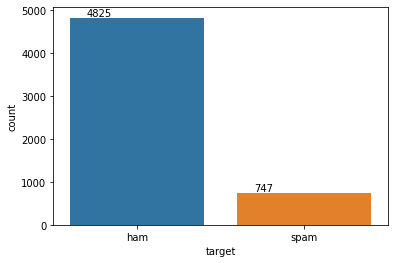

In [ ]:
ax=sns.countplot(x='target', data=data)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


#### Observation

- Target has 'ham' and 'spam' categorical values.
- We need to detect if a message is spam or not

#### Word Cloud 
For 'ham' messages
and for 'spam' messages

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# dataframe with only spam messages

df_spam = data.loc[data['target']=='spam', :]
df_spam.head(3)

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...


In [ ]:
# dataframe with only ham messages

df_ham = data.loc[data['target']=='ham', :]
df_ham.head(3)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...


In [43]:
# collecting all spam documents.

spm_words = ' '.join(df_spam['message'])
#print(spm_words)

In [ ]:
print(type(spm_words))
print(len(spm_words))

<class 'str'>
104333


In [44]:
# cleaning on spam messages

cleaned_spm_word = " ".join([word for word in spm_words.split()
                            if ( 'http' not in word 
                                and '.com' not in word 
                                and 'www' not in word 
                                and not word.startswith('£') 
                                and not word.isnumeric()
                                and len(word)>=4)
                            ])
print(len(cleaned_spm_word))
#cleaned_spm_word

73253


In [ ]:
# creating wordcloud object(spam msg)

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_spm_word)

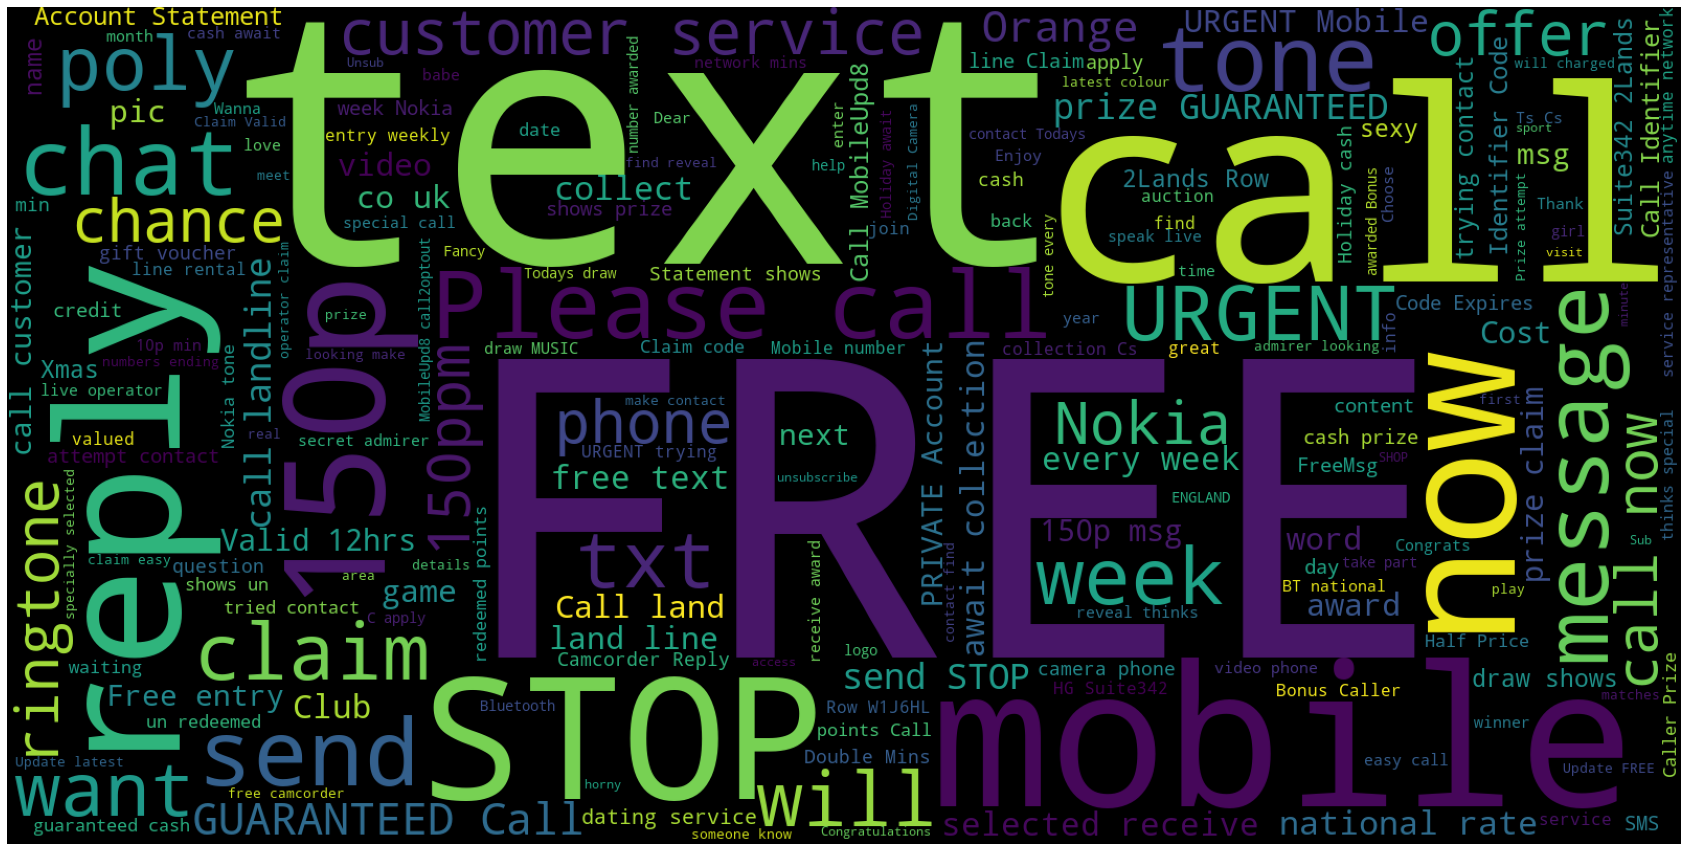

In [ ]:
# plotting wordcloud(spam msg)

plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Spam messages mostly contain keywords such as: FREE, text, customer service, urgent, offer, prize, claim, mobile, voucher, redeemed, etc.** 

In [45]:
# collecting all ham documents.

ham_words = ' '.join(df_ham['message'])
#print(ham_words)
print(len(ham_words))

349727


In [46]:
# cleaning on ham messages

cleaned_ham_word = " ".join([word for word in ham_words.split()
                            if ('.com' not in word 
                                and not word.startswith('£') 
                                and not word.isnumeric()
                                and len(word)>4)
                            ])
print(len(cleaned_ham_word))
#cleaned_ham_word

172326


In [ ]:
#creating worldcloud(ham msg)

wordcloud_ham = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_ham_word)

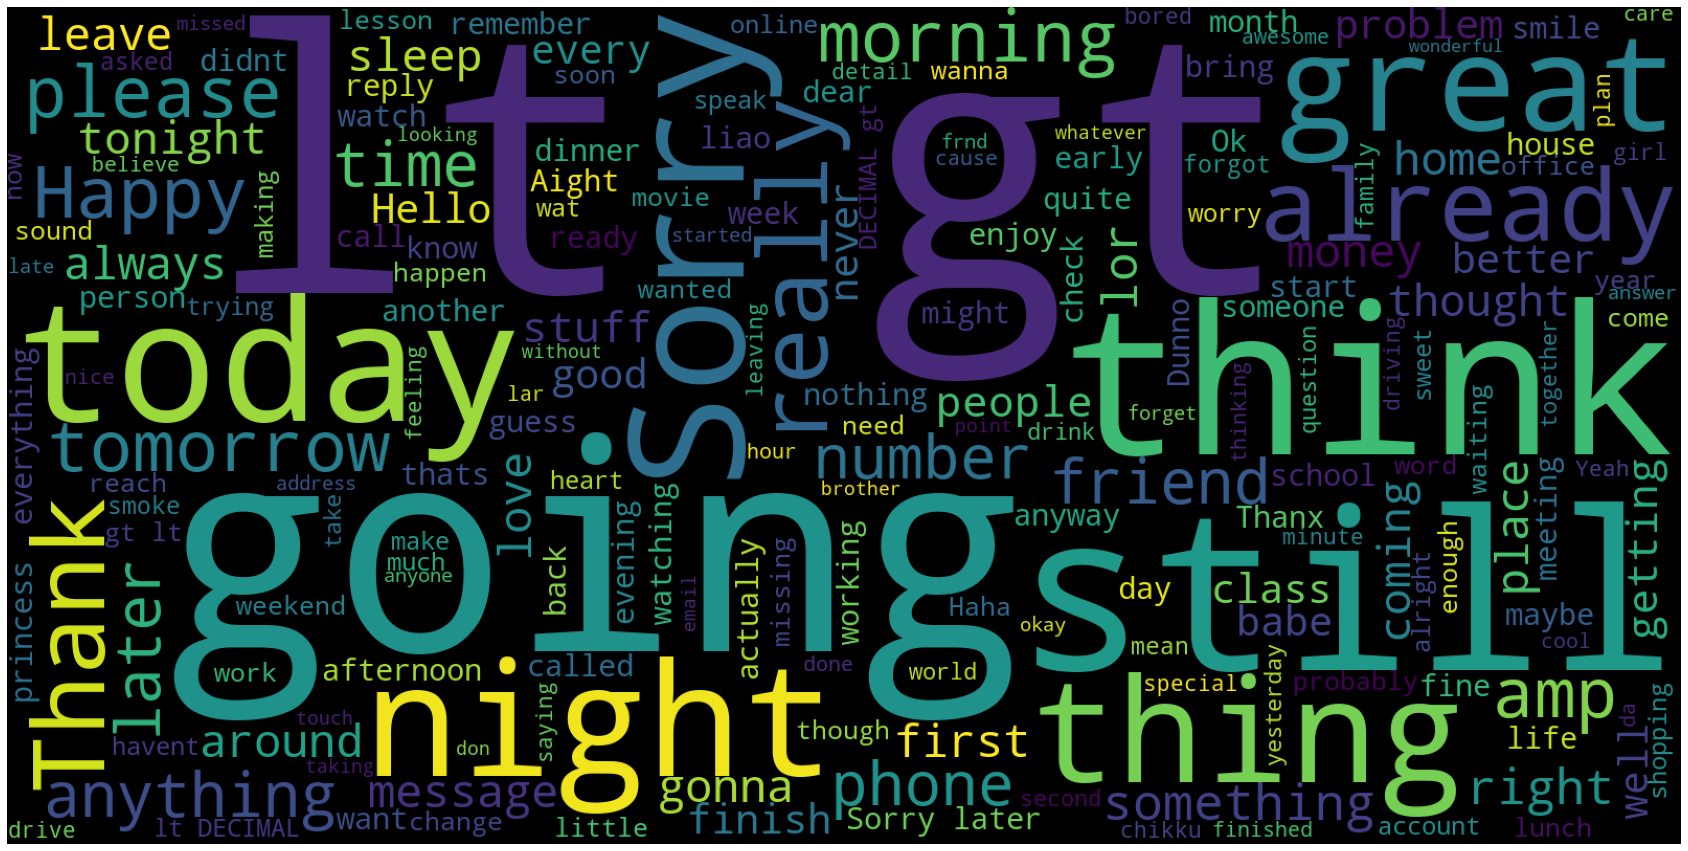

In [ ]:
# plotting wordcloud(ham msg)

plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud_ham)
plt.axis('off')
plt.show()

**Ham messages use keywords such as: think, tommorrow, later, happy, friend, please, sorry, today, morning, finish, leave, etc.**

## Data Preprocessing

Preprocessing steps:

- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization

In [ ]:
 import nltk
 nltk.download('stopwords')
 nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# initializing lemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
clean_msg = []
msg_len_lst = []

In [ ]:
def preprocess(msg):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",msg)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_msg.append(" ".join(words))
    
    msg_len_lst.append(len(words))

In [ ]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

data['message'].progress_apply(lambda x: preprocess(x))

data['clean_msg'] = clean_msg

data['msg_length'] = msg_len_lst


100%|██████████| 5572/5572 [00:11<00:00, 497.04it/s]


In [ ]:
data.head()

,target,message,clean_msg,msg_length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,7


## Data Preparation


In [ ]:
# Preparing target variable
data['target_bin']=data['target'].apply(lambda x: 0 if x=='spam' else 1)

data.head(3)

,target,message,clean_msg,msg_length,target_bin
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,21,0


In [ ]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(data,test_size=0.2,random_state=42)

In [ ]:
# creating lists of cleaned train and test data

train_clean_msg=[]
for word in train['clean_msg']:
    train_clean_msg.append(word)

test_clean_msg=[]
for word in test['clean_msg']:
    test_clean_msg.append(word)

In [ ]:
# Learning vocabulary from train data

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_msg)

test_features = vectorizer.transform(test_clean_msg)


In [47]:
#print(vectorizer.vocabulary_)

In [ ]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 6278
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 6278)


## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# Creating objects of algorithms.
# List of object

Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

  0%|          | 0/3 [00:00<?, ?it/s]

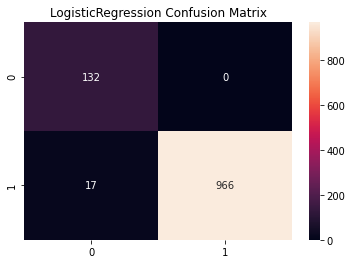

 33%|███▎      | 1/3 [00:01<00:03,  1.86s/it]

Accuracy of LogisticRegression is 0.9847533632286996


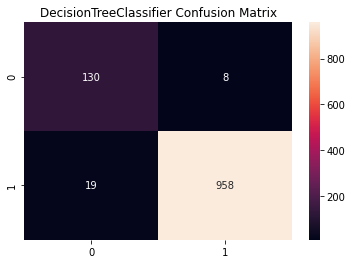

 67%|██████▋   | 2/3 [00:20<00:06,  6.99s/it]

Accuracy of DecisionTreeClassifier is 0.9757847533632287


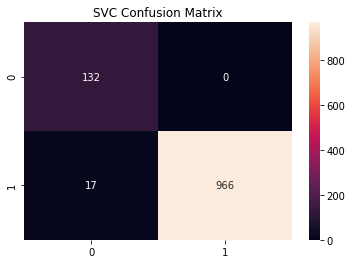

100%|██████████| 3/3 [01:44<00:00, 34.77s/it]

Accuracy of SVC is 0.9847533632286996


In [ ]:
# Converting sparse matrix into dense

dense_features = train_features.toarray()
dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    classifier.fit(dense_features,train['target_bin'])
    pred = classifier.predict(dense_test)
    accuracy = accuracy_score(pred,test['target_bin'])
    metric = metrics.confusion_matrix(pred,test['target_bin'])
    sns.heatmap(metric, annot=True,fmt='d')
    plt.title(classifier.__class__.__name__+" Confusion Matrix")
    plt.show()
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

## Accuracy score 

In [ ]:
# Accuracy matrix for each algorithm

for classifier in Classifiers:
    classifier.fit(dense_features,train['target_bin'])
    pred = classifier.predict(dense_test)
    print(classifier.__class__.__name__+'\n'+ metrics.classification_report(pred,test['target_bin'])+'\n\n')

LogisticRegression
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       132
           1       1.00      0.98      0.99       983

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.97      1115
weighted avg       0.99      0.98      0.99      1115



DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       137
           1       0.99      0.98      0.99       978

    accuracy                           0.98      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



SVC
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       132
           1       1.00      0.98      0.99       983

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.97      1115
weighted avg       0.99 

## Conclusion

*   Both LogisticRegression and SVM give same accuracy.
*   LogisticRegression 1.86 sec as compared to 34.77 sec taken by SVM.
*   LogisticRegression is better than SVM.



